In [1]:
import tensorflow as tf 
import numpy as np 
import math
import os 
from PIL import Image 
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing 
from scipy.stats import skew, boxcox
 
 

# Outlier Pursuit Model with L1 norm

In [6]:
lamlist1=[0.03,0.06,0.07,0.08,0.09,0.1,0.11,0.13,0.15] 
AUCL1=np.array([0.6310138745123592,0.7068359316808093,0.7159696046412036,0.724889826469739,0.7298860280453198,0.7269973410342561,0.7227199602157434,0.709696540694629,0.6966466392971411])
lamlist2=[0.05,0.07,0.11,0.13,0.15,0.17,0.19,0.21,0.23] 
PRL1=np.array([0.06245154560829626,0.07312842693288948,0.08446368661135512,0.08830585958218426,0.09112056908422936,0.09006436288738015,0.08817173479761753,0.08361170468109667,0.07729779148542182])

AUCL10=np.max([AUCL1,1-AUCL1],axis=0) 
print(AUCL10)

[0.63101387 0.70683593 0.7159696  0.72488983 0.72988603 0.72699734
 0.72271996 0.70969654 0.69664664]


No handles with labels found to put in legend.
No handles with labels found to put in legend.


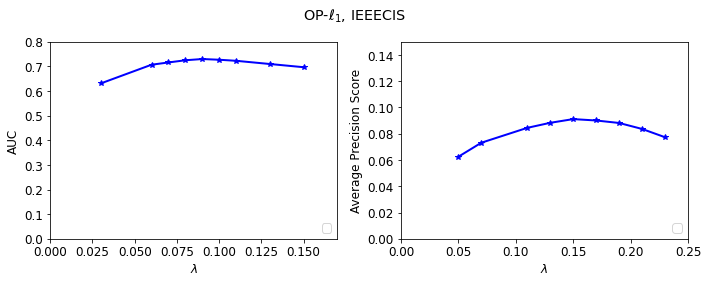

In [9]:
#title='Logistic Regression, TIC \n'
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
#axs[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#plt.title('AUC v.s. Ratio of Outliers')
axs[0].plot(lamlist1,AUCL10, '*-', color='b', lw=2,label='')#,label='{}ROC curve (area)'
axs[1].plot(lamlist2,PRL1, '*-', color='b', lw=2,label='')#,label='{}PRC curve (area)'
x=np.array([0.17,0.25])
y=np.array([0.8,0.15])
s=0
for ax, labels in zip(axs, (('$\lambda$', 'AUC'), ('$\lambda$', 'Average Precision Score'))):
    ax.set_xlim([0.0, x[s]])
    ax.set_ylim([0.0, y[s]])
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.legend(loc="lower right")
    s=s+1 
plt.suptitle('OP-$\ell_1$, IEEECIS')
#plt.title('AUC v.s. Ratio of Outliers')
plt.tight_layout(rect=(0.0, 0.0, 1.0, 0.92))
plt.savefig('IEEECISRatioL1.jpg')
plt.show()

# Outlier Pursuit Model with Lp norm

In [19]:
lamlist1=[0.05,0.06,0.09] # 
plist1=[0.8,0.85,0.9,0.95] 
AUCLp=np.array([0.6940696592457,0.7249751245420505,0.7267044614358661,0.7107294883365096,
    0.6856107678364276,0.6856107678364276,0.7254358371080735,0.7263340240932558, 
                0.6749924621904709,0.6844666409365116,0.6982588930019606,0.7153759506530228])
AUCLp0=np.max([AUCLp,1-AUCLp],axis=0)
print(AUCLp0)

[0.69406966 0.72497512 0.72670446 0.71072949 0.68561077 0.68561077
 0.72543584 0.72633402 0.67499246 0.68446664 0.69825889 0.71537595]


In [20]:
ss1=lamlist1.copy()
data=[]
s=0
for lam in lamlist1:
    data0=[]
    for p in plist1:
        data0.append(AUCLp0[s])
        s=s+1
    data.append(np.array(data0))
print(data)
fig1=[]
for ind in np.argsort(ss1):
    fig1.append(data[ind])
print(fig1)

[array([0.69406966, 0.72497512, 0.72670446, 0.71072949]), array([0.68561077, 0.68561077, 0.72543584, 0.72633402]), array([0.67499246, 0.68446664, 0.69825889, 0.71537595])]
[array([0.69406966, 0.72497512, 0.72670446, 0.71072949]), array([0.68561077, 0.68561077, 0.72543584, 0.72633402]), array([0.67499246, 0.68446664, 0.69825889, 0.71537595])]


In [21]:
lamlist2=[0.05,0.06,0.09] # 
plist2=[0.8,0.85,0.9,0.95] 

PRLp=np.array([0.06887843763507195,0.07482014344887793,0.0736714245217284,0.0692382374861956,
    0.06794159001113727,0.06794159001113727,0.07659916295738534,0.07502376101545993,
    0.06821988725901958,0.0764204355679011,0.08640698320790365,0.08465245663766072])

In [22]:
ss2=lamlist2.copy()
data=[]
s=0
for lam in lamlist2:
    data0=[]
    for p in plist2:
        data0.append(PRLp[s])
        s=s+1
    data.append(np.array(data0))
print(data)
fig2=[]
for ind in np.argsort(ss2):
    fig2.append(data[ind])
print(fig2)

[array([0.06887844, 0.07482014, 0.07367142, 0.06923824]), array([0.06794159, 0.06794159, 0.07659916, 0.07502376]), array([0.06821989, 0.07642044, 0.08640698, 0.08465246])]
[array([0.06887844, 0.07482014, 0.07367142, 0.06923824]), array([0.06794159, 0.06794159, 0.07659916, 0.07502376]), array([0.06821989, 0.07642044, 0.08640698, 0.08465246])]


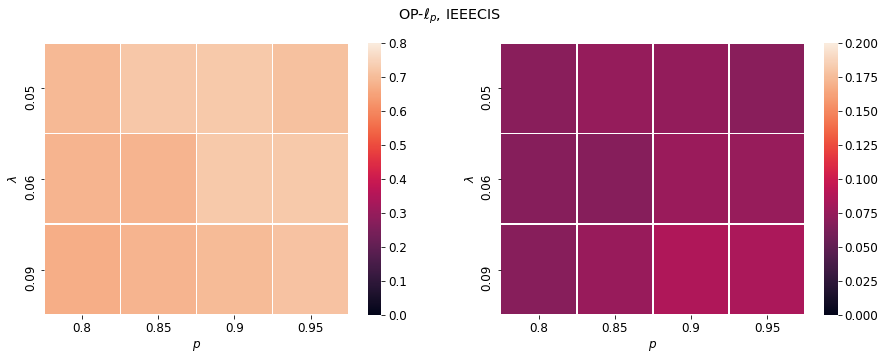

In [23]:
import numpy as np; np.random.seed(0)
import seaborn as sns

# uniform_data = np.random.rand(10, 12)    
# uniform_data2 = np.random.rand(100, 120)

figs, ax =plt.subplots(1,2,figsize=(15, 5))

ax1 = sns.heatmap(fig1, linewidth=0.5, xticklabels=plist1, yticklabels=np.sort(ss1), ax=ax[0],vmin=0, vmax=0.8)
ax1.set(xlabel='$p$', ylabel='$\lambda$')

ax2 = sns.heatmap(fig2, linewidth=0.5, xticklabels=plist2, yticklabels=np.sort(ss2), ax=ax[1],vmin=0, vmax=0.2)
ax2.set(xlabel='$p$', ylabel='$\lambda$')
plt.suptitle('OP-$\ell_p$, IEEECIS')
# sns.heatmap(uniform_data, ax=ax[0])
# sns.heatmap(uniform_data2, ax=ax[1])
plt.savefig('IEEECISRatioLp.jpg')
plt.show()

# Outlier Pursuit Model with ETP

In [26]:
lamlist1=[0.03,0.05,0.08,0.1,0.13] 
plist1=[0.000001]

AUCETP=np.array([0.6082953422241042,0.6897252241880482,0.7285764194526012,0.7286382562643796,0.7068046786044151])

AUCETP0=np.max([AUCETP,1-AUCETP],axis=0)
print(AUCETP0)

[0.60829534 0.68972522 0.72857642 0.72863826 0.70680468]


In [27]:
lamlist2=[0.03,0.05,0.08,0.1,0.13] # 
plist2=[0.000001] 

PRETP=np.array([0.05403011394581424,0.06755784604858464,0.07987396238041351,0.08452294730567841,0.08855970819106321])

No handles with labels found to put in legend.
No handles with labels found to put in legend.


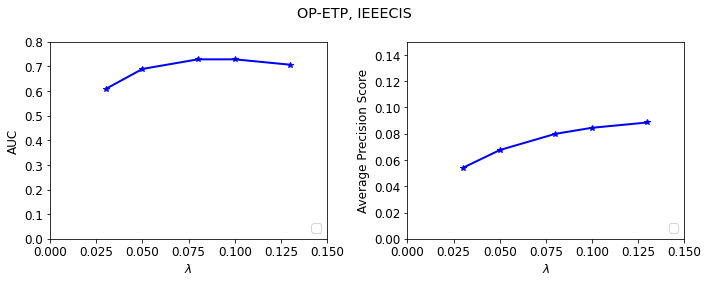

In [30]:
#title='Logistic Regression, TIC \n'
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
#axs[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#plt.title('AUC v.s. Ratio of Outliers')
axs[0].plot(lamlist1,AUCETP0, '*-', color='b', lw=2,label='')#,label='{}ROC curve (area)'
axs[1].plot(lamlist2,PRETP, '*-', color='b', lw=2,label='')#,label='{}PRC curve (area)'
x=np.array([0.15,0.15])
y=np.array([0.8,0.15])
s=0
for ax, labels in zip(axs, (('$\lambda$', 'AUC'), ('$\lambda$', 'Average Precision Score'))):
    ax.set_xlim([0.0, x[s]])
    ax.set_ylim([0.0, y[s]])
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.legend(loc="lower right")
    s=s+1 
plt.suptitle('OP-ETP, IEEECIS')
#plt.title('AUC v.s. Ratio of Outliers')
plt.tight_layout(rect=(0.0, 0.0, 1.0, 0.92))
plt.savefig('IEEECISRatioETP.jpg')
plt.show()